In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
from pandas import Series
import seaborn as sns
import numpy as np
dt = pd.read_csv('train.csv')

dt['occyp_type'].fillna("N", inplace=True)
print('null 개수: ', dt.isnull().sum().sum())

dt.drop(['FLAG_MOBIL'], axis=1, inplace=True)

# DAYS_EMPLOYED 가 양수인 데이터들이 있다. = 같은날.
print('EMPLOYED 양수 데이터 개수:')
print(dt['DAYS_EMPLOYED'][dt['DAYS_EMPLOYED'] > 0].value_counts(), '\n')

# 값 0으로 바꾸기
dt['DAYS_EMPLOYED'] = dt['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)

# 만 나이
ch_birth = dt.DAYS_BIRTH

#근무 개월
ch_emd = dt.DAYS_EMPLOYED


dt.DAYS_BIRTH = round(ch_birth*(-1)/365,0)
dt.DAYS_EMPLOYED = round(ch_emd*(-1)/30,0)

# 중복된 값들이 많아서 날리기
dt_dd = dt.drop_duplicates()

print(dt_dd)


null 개수:  0
EMPLOYED 양수 데이터 개수:
365243    4438
Name: DAYS_EMPLOYED, dtype: int64 

       index gender car reality  child_num  income_total  \
0          0      F   N       N          0      202500.0   
1          1      F   N       Y          1      247500.0   
2          2      M   Y       Y          0      450000.0   
3          3      F   N       Y          0      202500.0   
4          4      F   Y       Y          0      157500.0   
...      ...    ...  ..     ...        ...           ...   
26452  26452      F   N       N          2      225000.0   
26453  26453      F   N       Y          1      180000.0   
26454  26454      F   Y       N          0      292500.0   
26455  26455      M   N       Y          0      171000.0   
26456  26456      F   N       N          0       81000.0   

                income_type                       edu_type  \
0      Commercial associate               Higher education   
1      Commercial associate  Secondary / secondary special   
2         

In [3]:
data_submission

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0
...,...,...,...,...
9995,36452,0,0,0
9996,36453,0,0,0
9997,36454,0,0,0
9998,36455,0,0,0


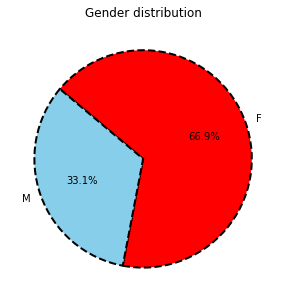

In [3]:
## 성별 시각화

import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
from pandas import Series
import seaborn as sns

df1= dt_dd.groupby('gender').count()['index']
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white')
plt.pie(df1, labels=df1.index,colors=['red','skyblue'], startangle=140,autopct='%1.1f%%',counterclock=False,wedgeprops = {'edgecolor':'k','linestyle':'--','linewidth':2})
plt.title('Gender distribution')
plt.show()

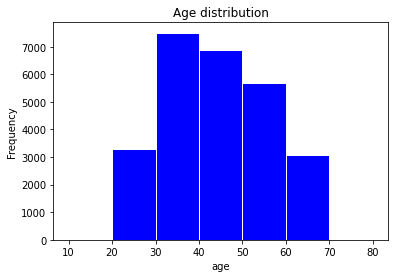

In [5]:
## 나이대 변환 및 시각화

dt_dd['DAYS_BIRTH'].plot.hist(bins=range(10,81,10),color='b', edgecolor='w')
plt.xlabel('age')
plt.title('Age distribution')
plt.show()

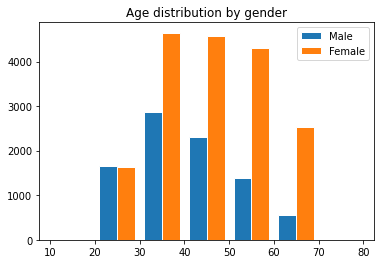

In [6]:
## 성별에 따른 나이대

gender = dt_dd.groupby('gender')
M_group= gender.get_group('M')
F_group= gender.get_group('F')
M = M_group['DAYS_BIRTH']
F = F_group['DAYS_BIRTH']

plt.hist([M,F], bins=range(10,81,10), label=['Male', 'Female'], edgecolor='w')
plt.legend(loc='upper right')
plt.title('Age distribution by gender')
plt.show()

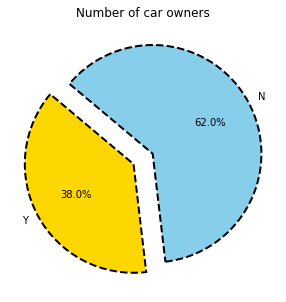

In [7]:
## 자동차 소유 여부

df1= dt_dd.groupby('car').count()['index']
explode = (0.1, 0.1)
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white')
plt.pie(df1, labels=df1.index,colors=['skyblue','gold'],explode=explode, startangle=140,autopct='%1.1f%%',counterclock=False,wedgeprops = {'edgecolor':'k','linestyle':'--','linewidth':2})
plt.title('Number of car owners')
plt.show()

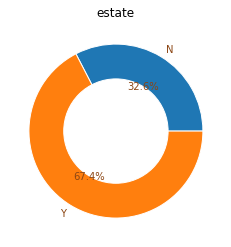

In [8]:
## 부동산 소유 여부

df1= dt_dd.groupby('reality').count()['index']
my_circle=plt.Circle((0,0),0.6,color='white')
fig = plt.figure()
plt.pie(df1,labels=df1.index,wedgeprops={'linewidth':1,'edgecolor':'white'},autopct='%1.1f%%',textprops={'color':"saddlebrown"})
p=plt.gcf()
p.gca().add_artist(my_circle)
fig.patch.set_facecolor('white')
plt.title('estate',color='black')
plt.show()

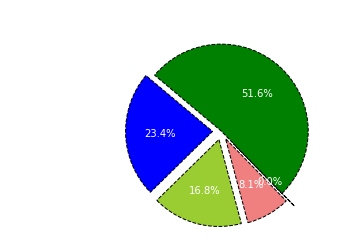

In [9]:
## 소득 유형

it = dt_dd.groupby('income_type').count()['index']

explode = (0.1, 0.1, 0.1, 0.2, 0.0)
colors = ['blue', 'yellowgreen', 'lightcoral', 'lightskyblue', 'green']
plt.pie(it,explode=explode,colors=colors, labels=it.index, startangle=140,autopct='%1.1f%%',wedgeprops = {'edgecolor':'k','linestyle':'--','linewidth':1},textprops={'color':"white"})
title_color = 'white'
plt.title('Income type',color=title_color)
plt.show()

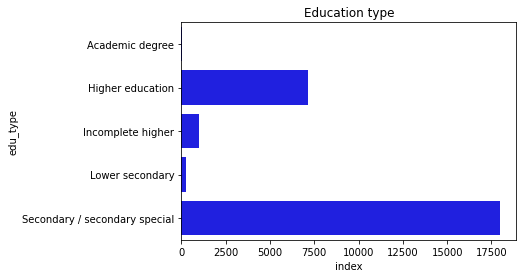

In [10]:
## 교육 유형

et = dt_dd.groupby('edu_type').count()['index']
et = et.reset_index()

sns.barplot(data=et, y="edu_type", x="index", orient='h',color='blue')
title_color = 'black'
plt.title('Education type',color=title_color)
plt.show()

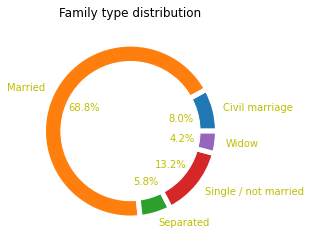

In [11]:
## 가족 유형

ft = dt_dd.groupby('family_type').count()['index']
my_circle=plt.Circle((0,0),0.8,color='white')
fig = plt.figure()
plt.pie(ft,labels=ft.index,wedgeprops={'linewidth':5,'edgecolor':'white'},autopct='%1.1f%%',textprops={'color':"y"})
p=plt.gcf()
p.gca().add_artist(my_circle)
fig.patch.set_facecolor('white')
plt.title('Family type distribution',color='black')
plt.show()

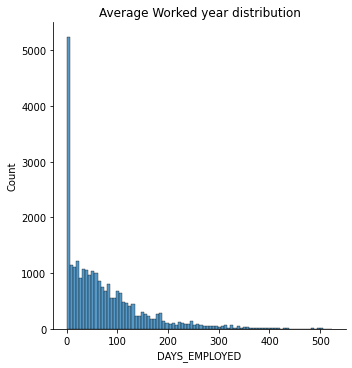

In [30]:

sns.displot(data=dt_dd,x=dt_dd["DAYS_EMPLOYED"],kind='hist',)
plt.title('Average Worked year distribution')
plt.show()

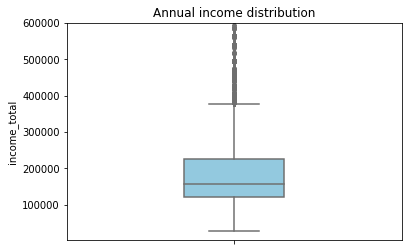

In [31]:
sns.boxplot(data=dt_dd,y="income_total", width=0.3, color='skyblue')
plt.title('Annual income distribution')
plt.ylim(2000, 600000)
plt.show()

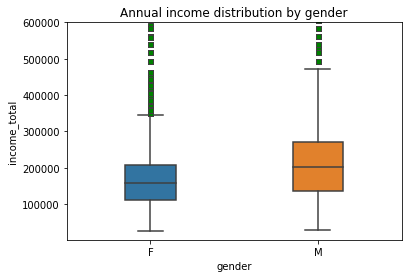

In [32]:
green = dict(markerfacecolor='g', marker='s')
sns.boxplot(data=dt_dd,y="income_total",x='gender', width=0.3,flierprops=green)
plt.title('Annual income distribution by gender')
plt.ylim(2000, 600000)
plt.show()

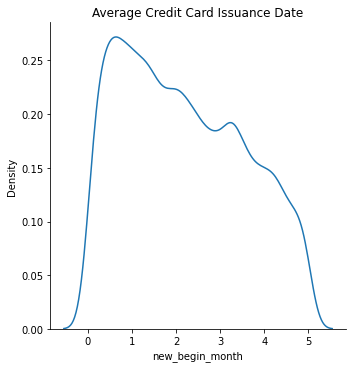

In [34]:
dt_dd['new_begin_month'] = [0 if s >=0 else round(abs(s)/12,2) for s in dt_dd['begin_month']]

sns.displot(data=dt_dd,x='new_begin_month',kind='kde')
title_color = 'black'
plt.title('Average Credit Card Issuance Date',color=title_color)
plt.show()

[Text(0, 0, 'Accountants'),
 Text(1, 0, 'Cleaning staff'),
 Text(2, 0, 'Cooking staff'),
 Text(3, 0, 'Core staff'),
 Text(4, 0, 'Drivers'),
 Text(5, 0, 'HR staff'),
 Text(6, 0, 'High skill tech staff'),
 Text(7, 0, 'IT staff'),
 Text(8, 0, 'Laborers'),
 Text(9, 0, 'Low-skill Laborers'),
 Text(10, 0, 'Managers'),
 Text(11, 0, 'Medicine staff'),
 Text(12, 0, 'N'),
 Text(13, 0, 'Private service staff'),
 Text(14, 0, 'Realty agents'),
 Text(15, 0, 'Sales staff'),
 Text(16, 0, 'Secretaries'),
 Text(17, 0, 'Security staff'),
 Text(18, 0, 'Waiters/barmen staff')]

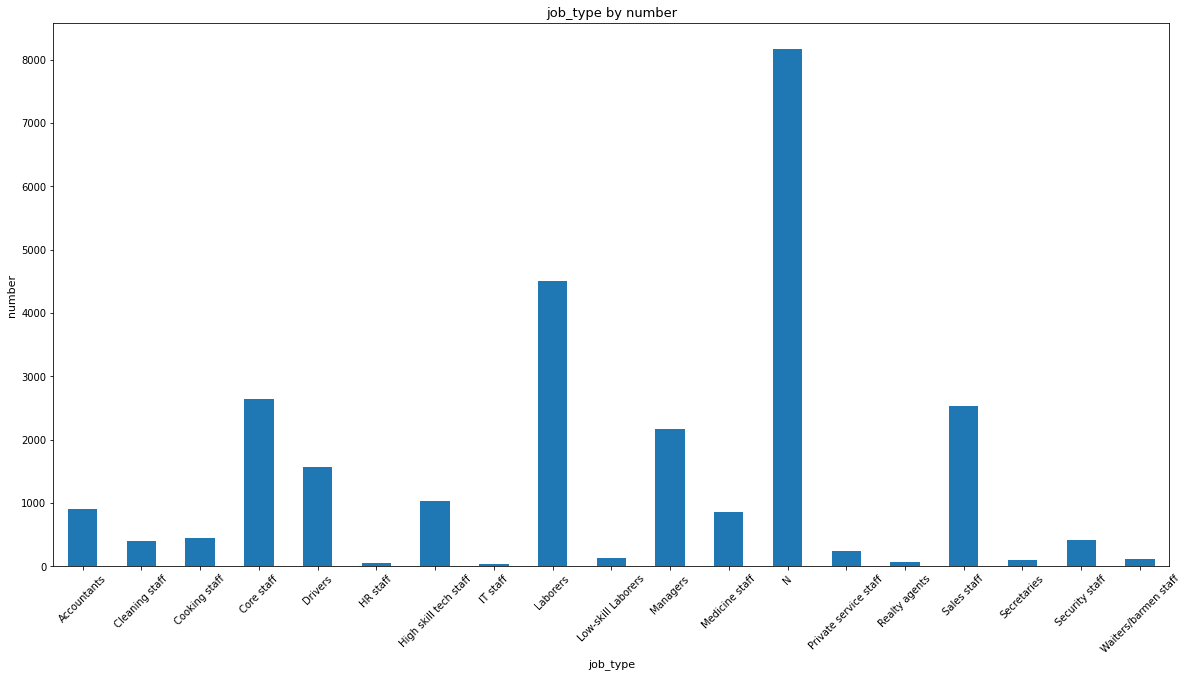

In [35]:
ot = dt_dd.groupby('occyp_type').count()['index']
plot = ot.plot(kind='bar',figsize=(20,10))
plot.set_xlabel('job_type',fontsize=11)
plot.set_ylabel('number',fontsize=11)
plot.set_title('job_type by number',fontsize=13)
plot.set_xticklabels(labels=ot.index,rotation=45)

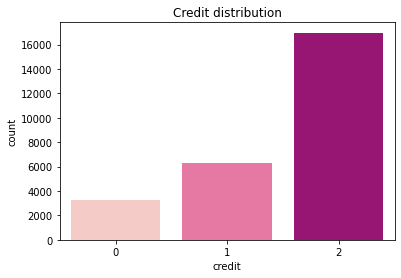

In [36]:
sns.countplot(data=dt_dd, x="credit",palette="RdPu")
plt.title('Credit distribution')
plt.show()

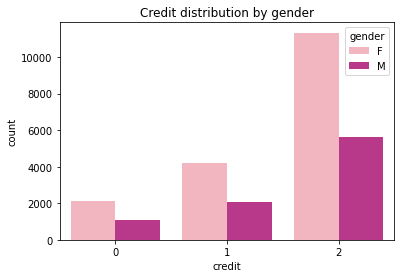

In [37]:
sns.countplot(data=dt_dd, x="credit",hue='gender',palette="RdPu")
plt.title('Credit distribution by gender')
plt.show()